In [55]:
from typing import List, Dict, Iterable, Tuple, Callable
from matplotlib import pyplot as plt
from collections import Counter
import sys
import os
import string
import urllib.request
import requests
import curl
import pycurl
import webbrowser
import numpy as np
import math
import pandas as pd
# from IPython import qt
from matplotlib.pyplot import figure
from py.xml import raw
from requests.api import get
from matplotlib import pyplot as plt
import math
import os
import random
import sys
from functools import partial, reduce
from scipy.optimize import fmin_tnc
import itertools
import random
import tqdm
from typing import*
from collections import*
from scipy import*
from sklearn.metrics import*
from numpy import *
import random
from itertools import cycle
from sklearn import*
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
import collections


In [56]:
class LogisticRegressionCustom(object):
    def __init__(self, eta=0.01, n_iter=10000):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)
#         self.w = np.ones(X.shape[1])
        self.w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        m = X.shape[0]

        for _ in range(self.n_iter):
            output = X.dot(self.w)
            errors = y - self._sigmoid(output)
            self.w += self.eta / m * errors.dot(X)
        return self

    def predict(self, X):
        output = np.insert(X, 0, 1, axis=1).dot(self.w)
        return (np.floor(self._sigmoid(output) + .5)).astype(int)

    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [57]:
import requests
import csv


df_loans_full = pd.read_csv('MergedLabeled.csv', header = None, skiprows=1)
df_loans_full

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,20122,33152,2014-12-08,debtconsolidation,0,15405,48 months,9.52,387,...,9,7,16314,54.000000,0,1,1,0,0,1026398210
1,2,20344,53857,2016-06-19,homeimprovement,0,28529,36 months,17.90,1030,...,10,5,14600,48.840000,0,0,0,3,0,-868996371
2,3,22077,64998,2014-06-29,debtconsolidation,0,14113,36 months,15.61,493,...,15,13,13665,83.949997,0,0,0,0,0,-389639751
3,4,22581,84947,2015-05-18,debtconsolidation,0,21204,60 months,5.95,409,...,7,6,10344,77.010002,11,0,0,0,0,1240408668
4,5,25176,60208,2014-11-30,debtconsolidation,0,20893,60 months,8.25,426,...,14,14,19694,70.260002,0,13,9,2,0,1220269697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,94170,53633,2016-01-05,homeimprovement,0,18936,60 months,9.61,399,...,19,16,14525,87.629997,2,0,0,1,0,-1870257149
9996,9997,99570,62115,2014-08-22,debtconsolidation,0,22797,60 months,7.37,455,...,7,3,15919,49.400002,0,0,0,0,0,1857008161
9997,9998,102795,55718,2015-05-25,homeimprovement,0,25104,36 months,7.93,786,...,11,10,15735,50.680000,0,0,0,0,0,-1911701526
9998,9999,103509,74249,2016-06-16,debtconsolidation,0,17143,48 months,5.37,398,...,15,8,13002,59.560001,0,0,0,1,0,2076012910


In [58]:
for i in range(len(df_loans_full[7])):
    label = df_loans_full.iloc[i,7]
    label = label[:2].split(" ")[-1]    
    df_loans_full.iloc[i,7] = label

In [59]:
# Select columns
# col = [6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27]
# col = [6,7,8,9,15,16,17,18,19]
# col = [6,7,8]
col = [6,7]
df_loans = df_loans_full.iloc[:,col]
loans_df = df_loans
df_loans
# loans_df.squeeze()

,6,7
0,15405,48
1,28529,36
2,14113,36
3,21204,60
4,20893,60
...,...,...
9995,18936,60
9996,22797,60
9997,25104,36
9998,17143,48


In [60]:
# Binary vector. Rate of bad loans
df_isbad = df_loans_full.iloc[:,28]
df_isbad

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: 28, Length: 10000, dtype: int64

In [61]:
loans = df_loans.to_numpy()
pred = df_isbad.to_numpy()
pred = np.asarray(pred,dtype('float'))
loans = np.asarray(loans,dtype('float'))
loans = loans.reshape(len(df_loans),len(col))
pred = pred.reshape(len(df_loans),1)

In [62]:
# Custom Logistic Regression

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(loans, pred, test_size=0.3)

# Apply Logistic Regression
logi = LogisticRegressionCustom().fit(X_train, y_train.ravel())
# Accuracy Rate
print(logi.score(X_train, y_train.ravel()))
# Prediction
pred_X_train = logi.predict(X_test) 
# pred0 = logi.predict(X_test)

# Create prediction vector.
# Create list of indexes 
test_val = 0
test_val_index = []
for i in range(len(pred_X_train)):
#     print(pred_X_train[i])
    if pred_X_train[i] == y_test[i]:
        test_val += 1
        test_val_index.append(i)
# List of Indexes
# print(test_val_index)
# Number of predicted values against orginal values
print(test_val)
# Length of list of split binary vector
len(pred_X_train)


C:\Users\USER\AppData\Local\Temp/ipykernel_33800/2305925343.py:26: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.9012857142857142
2691


3000

In [63]:
# List of Predicted values (0 or 1)
# predicted = []
# for i in range(len(pred_X_train)):
#     if i < test_val:
#         if i == test_val_index[i]:
#             predicted.append(pred_X_train[i])
#     else:
#         predicted.append(int(y_test[i].tolist()[0]))
# len(predicted)  

# List of Predicted values (0 or 1)
predicted = []
predicted = y_test
for i in range(len(pred_X_train)):
    if i < test_val:
        if i == test_val_index[i]:
            predicted[i] = pred_X_train[i]
    else:
        predicted[i] = int(y_test[i].tolist()[0])
len(predicted)    


3000

In [64]:
# Sklearn Logisitc Regression model

# for _ in range(10):
# X_train, X_test, y_train, y_test = train_test_split(loans, pred, test_size=0.3)

# Sklearn Logistic Regression function
clf = LogisticRegression().fit(X_train, y_train.ravel())
# Accuracy
print(clf.score(X_train,y_train))
# Predicted vector
clf_pred = clf.predict(X_test)
# clf_pred[clf_pred == 1]

# Create prediction vector.
# Create list of indexes 
test_val_reg = 0
test_val_index_reg = []
for i in range(len(clf_pred)):
#     print(pred_X_train[i])
    if clf_pred[i] == y_test[i]:
        test_val_reg += 1
        test_val_index_reg.append(i)
# List of Indexes
# print(test_val_index_reg)
# Number of predicted values against orginal values
print(test_val_reg)
# Length of list of split binary vecto
len(clf_pred)

0.9012857142857142
2691


3000

In [65]:
# List of Predicted values (0 or 1)

# List of Predicted values (0 or 1)
# predicted = []
predicted_reg = y_test
for i in range(len(pred_X_train)):
    if i < test_val_reg:
        if i == test_val_index_reg[i]:
            predicted_reg[i] = pred_X_train[i]
    else:
        predicted_reg[i] = int(y_test[i].tolist()[0])
# print(len(predicted_reg))    
predicted_reg

# predicted_reg = []
# for i in range(len(pred_X_train)):
#     if i < test_val_reg:
#         if i == test_val_index_reg[i]:
#             predicted_reg.append(pred_X_train[i])
#     else:
#         predicted_reg.append(int(y_test[i].tolist()[0]))
# predicted_reg  

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [66]:
# Create Dataframe to compare original and predicted values (0 or 1)
df_pred_concat = pd.DataFrame([pred[0:len(predicted)].tolist(),predicted,predicted_reg])
df_pred = df_pred_concat.T
df_pred

,0,1,2
0,[0.0],[1.0],[1.0]
1,[0.0],[0.0],[0.0]
2,[0.0],[0.0],[0.0]
3,[0.0],[0.0],[0.0]
4,[0.0],[0.0],[0.0]
...,...,...,...
2995,[0.0],[0.0],[0.0]
2996,[0.0],[0.0],[0.0]
2997,[0.0],[0.0],[0.0]
2998,[0.0],[0.0],[0.0]


In [67]:
wg_0 = logi.w
wg = (logi.w - np.mean(logi.w))/np.std(logi.w)
wg 

array([ 1.10231318, -1.31841094,  0.21609776])

In [68]:
# Actual
actuals = list(y_test)
# Scored values
scored = logi._sigmoid(y_test)
# Threshold
threshold = np.max(np.unique(scored))
threshold

0.7310585786300049

In [69]:
X_test_0 = X_test
X_test = (X_test - np.mean(X_test))/np.std(X_test)

# Size of array
X_test_shape = X_test.shape
# Total number of observations
X_obs = X_test_shape[0] * X_test_shape[1]
X_obs


6000

In [70]:
# Coefficients
# Reshape input array
x_0 = int(X_obs/len(wg))
z = np.dot(X_test.reshape(x_0,len(wg)),wg)


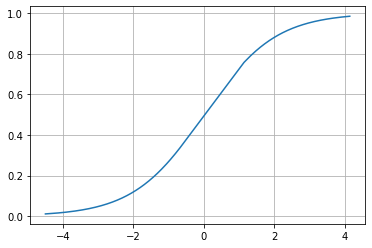

In [71]:
# Apply sigmoid function
def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))
    
h = sigmoid(z)
h1 = h[0:len(z)]

# Plot sigmoid function
plt.plot(sorted(z),sorted(h))
plt.grid()

1038
(array([673], dtype=int64),)


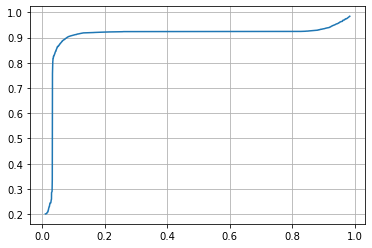

In [72]:
# Apply random threshold

# Threshold value
threshold_rand = 0.2
# Create Threshold to seperate values
h2 = h[h >= threshold_rand]
print(len(h2))
# Find corresponding set of array indices
h2_index = np.where(h == np.min(h2))
print(h2_index)

# z: X-axis
zz = h[len(h)-len(h2):]
len(zz)
plt.plot(sorted(zz),sorted(h2))
plt.grid()

In [73]:
# Create Confusion Matrix
ConfMat = collections.namedtuple('conf', ['tp','fp','tn','fn']) 

In [74]:
def ConfusionMatrix(actuals, scores, threshold, positive_label=1):
    tp=fp=0
    fn=tn=1
    actuals_bool = [actual==positive_label for actual in actuals]
    FPR = TPR = []
    FPR.append(0)
#     TPR.append(0)
    FPR_0 = TPR_0 = 1
    for bool_0, score in zip(actuals_bool, scores):
        if score >= threshold:                      # predicted positive 
            if bool_0 == True:                              # actually positive 
                tp += 1
            else:                                  # actually negative              
                fp += 1          
        else:                                      # predicted negative 
            if bool_0 == False:                          # actually negative 
                tn += 1                          
            else:                                  # actually positive 
                fn += 1
                
        if (fp + tn) != 0:
            FPR_1 = np.sum(fp)/(fp+tn)
            FPR.append(FPR_1)
            FPR_0 = FPR_1
        else:
            FPR.append(FPR_0)
    tp=fp=0
    fn=tn=1        
    TPR = []
    TPR.append(0)
    TPR_0 = 1
    for bool_0, score in zip(actuals_bool, scores):
        if score >= threshold:                      # predicted positive 
            if bool_0 == True:                              # actually positive 
                tp += 1
            else:                                  # actually negative              
                fp += 1          
        else:                                      # predicted negative 
            if bool_0 == False:                          # actually negative 
                tn += 1                          
            else:                                  # actually positive 
                fn += 1
        
        if (tp + fn) != 0 :
            TPR_1 = np.sum(tp)/(tp+fn)
            TPR.append(TPR_1)
            TPR_0 = TPR_1
        else:
            TPR.append(TPR_0)
            
    tp=fp=0
    fn=tn=1        
    Precision = []
    Precision.append(1)
    Precision_0 = 1
    for bool_0, score in zip(actuals_bool, scores):
        if score >= threshold:                      # predicted positive 
            if bool_0 == True:                              # actually positive 
                tp += 1
            else:                                  # actually negative              
                fp += 1          
        else:                                      # predicted negative 
            if bool_0 == False:                          # actually negative 
                tn += 1                          
            else:                                  # actually positive 
                fn += 1
        
        if (tp + fp) != 0 :
            Precision_1 = np.sum(tp)/(tp+fp)
            Precision.append(Precision_1)
            Precision_0 = Precision_1
        else:
            Precision.append(Precision_0)
            

    return ConfMat(tp, fp, tn, fn), FPR,TPR,Precision

In [75]:
# # Create Threshold to seperate values
# h3 = h[h >= 0.2]

# con_mat, FPR, TPR = ConfusionMatrix(actuals, h3, threshold, positive_label=1)
# # plt.plot((FPR),(TPR))
# # plt.plot(sorted(TPR))
# # plt.grid(True, 'major', color='k')
# # plt.minorticks_on()
# # plt.grid(True, 'minor', 'y')
# # plt.show()


1008
(array([121], dtype=int64),)
1008


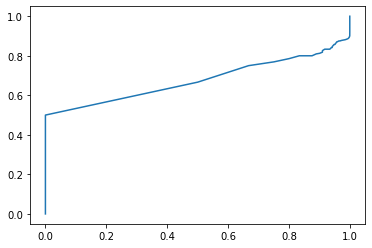

In [76]:
# Create Threshold to seperate values
h3 = h[h >= 0.2]

h4 = h[h >= 1-threshold]
h5 = h[h >= threshold]
# print(h4)
print(len(h4))
h4_index = np.where(h == np.min(h4))
print(h4_index)

# z: X-axis
zz_1 = h[len(h)-len(h4):]
print(len(zz_1))

# Enact Confusion Matrix
con_mat, FPR, TPR, Precision = ConfusionMatrix(actuals, h5, 1-threshold, positive_label=0)
# con_mat, FPR, TPR, Precision = ConfusionMatrix(actuals, h4, threshold, positive_label=0)

# Confusion Matrix
con_mat

# Subset rates
FPR = FPR[0:int(len(FPR))]
TPR = TPR[0:int(len(TPR))]
# FPR[100],TPR[100]
# TPR
# Precision
plt.plot(sorted(TPR),sorted(Precision))

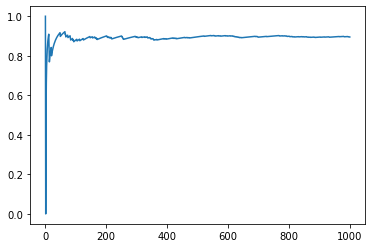

In [77]:
specificity = []
# FPR
for i in range(0,len(FPR)):
    specificity.append(1 - FPR[i])
    
# plt.plot((TPR))
# plt.plot(specificity,TPR)
plt.plot(Precision)

In [78]:
poly_deg = 2
x_confusionmat = TPR
# x_confusionmat
y_confusionmat = FPR[0:len(x_confusionmat)]
# y = int(y)
# coeff = polyregression_coefficients(x,y,poly_deg)
# coeff

In [79]:
def polyregression_coefficients(x:list, y:list, poly_deg:int):
    # Matrix Size: Degree of Polynomial
#     poly_deg = 2
    mat_size = poly_deg + 1

    # Create dummy matrix
    a = np.ones((mat_size,mat_size))
    b = np.ones((mat_size,1))

    # Normalize input array
    # Mean
    meanX = np.mean(x, axis=0)
    # Standard Deviation
    stdX = np.std(x, axis = 0)
    # Variance
    varX = np.var(x)
    # Normalize variables
    x = (x- meanX) / stdX

    # Normalize output array
#     # Mean
#     meanY = np.mean(y, axis=0)
#     # Standard Deviation
#     stdY = np.std(y, axis = 0)
#     # Variance
#     varY = np.var(y)

    # varX = np.var(y)
    # meanY = np.mean(y)
    # stdY = np.std(y)

    # Create design input matrix
    for i in range(0,mat_size):
        for j in range(0,mat_size):
            a[i][j] = sum(np.power(x,(i+j)))

    # Create input matrix
    amat = np.mat(a)

    # Create design output matrix
    for k in range(0, mat_size):
        b[k] = sum(np.power(x,k) * y)

    # Calculate coefficients
    # Inverse input matrix
    amat_inv = np.linalg.pinv(amat)
    # Solve for coefficients
    z = amat_inv * b
    # Transpose coefficient vector
    coeff = z.T
    # Reverse index list
    coeff = coeff[::-1]
#     print("z3: ", coeff)
    
    return coeff

def polyregression_line(x:list, coeff:list, poly_deg:int):
    
    # Matrix Size: Degree of Polynomial
    #     poly_deg = 2
    mat_size = poly_deg + 1
    
    # Sort values
    x = np.sort(x)
    
    # Normalize input array
    # Mean
    meanX = np.mean(x, axis=0)
    # Standard Deviation
    stdX = np.std(x, axis = 0)
    # Variance
    varX = np.var(x)
    # Normalize variables
    x = (x - meanX) / stdX
    
    # Create dummy array
    J = np.ones((len(x), 1))
    cost = np.ones((len(x),1))
    vec_out = np.ones((mat_size, 1))
    
    # Solve for predicted values
    for q in (range(len(x))):
        for p in range(0, mat_size):
            vec_out[p] = x[q] ** p
        # Algebraic vector
        vec_out = np.matrix(vec_out)
        # Matrix multiplication
        l = np.matmul(coeff,vec_out)
        J[q] = l
        # Cost Function
        cost[q] = (1/(2 * len(x))) * np.sum(np.square(J[q] - vec_out))
        
    return J,cost

In [80]:
# x_mat=y_mat=[]
# # x_confusionmat = np.sort(x_confusionmat)
# for i in range(0,len(x_confusionmat)):
#     if x_confusionmat[i] > 0 and y_confusionmat[i] > 0:
#         x_mat.append(x_confusionmat[i])
#         y_mat.append(y_confusionmat[i])
        
# plt.scatter(x_mat,y_mat)

In [81]:
# poly_deg = 2
# x_confusionmat = sorted(x_mat)
# y_confusionmat = sorted(y_mat[0:len(x_mat)])
# coeff = polyregression_coefficients(x_confusionmat,y_confusionmat,poly_deg)
# # coeff
# poly_plt,poly_cost = polyregression_line(x_confusionmat, coeff, poly_deg)

# plt.scatter(x_confusionmat,y_confusionmat)
# plt.plot(sorted(x_confusionmat),sorted(poly_plt), color='red')

# np.min(poly_plt)

# # hplt_index = np.where(y_confusionmat == np.min(poly_plt))
# # print(hplt_index)

# print(poly_plt[0])
# print(x_confusionmat[0])

# # Complete line
# # Create coordinates
# coord_1 = (x_confusionmat[0],x_confusionmat[0])
# coord_2 = (x_confusionmat[0],poly_plt[0])

# plt.plot(coord_1,coord_2, color='red')

X mat: 0.0
Coefficients:  [[0.97468685 0.06336282 0.00165297]]
Prec min:  0.3721945582000946
Prec 0:  0.3721945582000946
0.0
0.3721945582000946


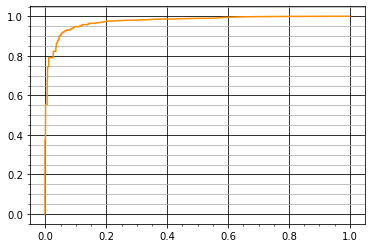

In [82]:
poly_deg = 2
x_confusionmat = sorted(TPR)
y_confusionmat = sorted(FPR[0:len(x_confusionmat)])

x_mat = y_mat = []
x_zero = y_zero = 0
for i in range(0,len(x_confusionmat)):
    if x_confusionmat[i] > 0 and y_confusionmat[i] > 0:
        x_mat.append(x_confusionmat[i])
        y_mat.append(y_confusionmat[i])
    else:
        x_zero += 1
        y_zero += 1
        
# print(x_mat)
# print(y_mat)
# print(x_zero)
# print(y_zero)

x_mat = np.insert(x_mat,0,x_confusionmat[x_zero-1])
y_mat = np.insert(y_mat,0,y_confusionmat[y_zero-1])

# plt.scatter(sorted(x_mat),sorted(y_mat))

print("X mat:",x_mat[0])
        
coeff = polyregression_coefficients(x_mat,y_mat,poly_deg)
print("Coefficients: ", coeff)
poly_plt,poly_cost = polyregression_line(x_mat, coeff, poly_deg)

# plt.scatter(x_mat,y_mat)
# Create list
x_list = list(range(0,len(poly_plt)))
new_list = [x / len(poly_plt) for x in x_list]

x_sig = sigmoid(np.array(x_list))
# print(x_sig)
# print(sorted(x_mat))
# print(x_list)

# print(np.mean(x_list))

# x_0 = (x_list - np.mean(x_list, axis=0))/np.std(x_list, axis=0)
# print(x_0)

# plt.plot(sorted(x_mat),sorted(poly_plt), color='darkorange')
plt.plot(new_list,poly_plt, color='darkorange')

# np.min(poly_plt)

# hplt_index = np.where(y_confusionmat == np.min(poly_plt))
# print(hplt_index)

# print(poly_plt)
# print(x_confusionmat)

# Complete line
print("Prec min: ", np.min(poly_plt))
print("Prec 0: ", poly_plt[0][0])
if np.min(poly_plt) <= poly_plt[0]:
    # Precision
    prec = poly_plt[0][0]
else:
    prec = np.min(poly_plt)
# Create coordinates
coord_1_ROC = (0,0)
# coord_2 = (0,np.min(poly_plt))
coord_2_ROC = (0,prec)

plt.plot(coord_1_ROC,coord_2_ROC, color='darkorange')

plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')
print(x_mat[0])
print(poly_plt[0][0])

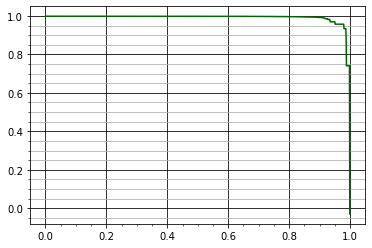

In [83]:
coeff = polyregression_coefficients(specificity,TPR,poly_deg)
coeff
poly_plt,poly_cost = polyregression_line(specificity, coeff, poly_deg)

x_list = list(range(0,len(poly_plt)))
new_list = [x / len(poly_plt) for x in x_list]

plt.plot(new_list,poly_plt, color='darkgreen')
# Complete line
# Create coordinates
# coord_1 = (1,np.max(poly_plt))
# coord_2 = (1,np.min(poly_plt))

# plt.scatter(coord_1,coord_2, color='darkred')

plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


0.07194850218771076

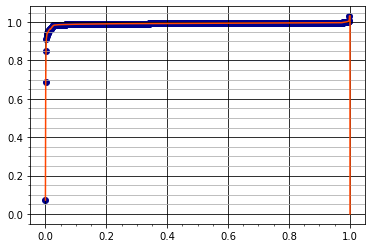

In [84]:
# (Precision),(TPR)
poly_deg = 2
coeff = polyregression_coefficients(Precision,TPR,poly_deg)
coeff
poly_plt_2,poly_cost_2 = polyregression_line(Precision, coeff, poly_deg)

x_list = list(range(0,len(poly_plt_2)))
poly_list = len(poly_plt_2)
new_list_2 = [x / poly_list for x in x_list]

poly_plt_2 = np.abs(poly_plt_2)

plt.scatter(new_list_2,poly_plt_2, color='darkblue')
plt.plot(new_list_2,poly_plt_2, color = 'orangered')

# x_ind_0 = np.argmin(poly_plt, axis=0)
# # x_ind_0
# poly_plt[x_ind_0]
# x_ind_1 = x_ind_0 + 1
# poly_plt_2 = poly_plt[1*10:]
# np.min(poly_plt_2)


# Complete line
# Create coordinates
coord_1_prec_recall = (1,1)
coord_2_prec_recall = (0,poly_plt_2[-1])

plt.plot(coord_1_prec_recall,coord_2_prec_recall, color='orangered')

plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')

np.min(poly_plt_2)

# print(coord_1)
# print(coord_2)

In [85]:
# # new = [i[0] for i in FPR]

# plot1 = plt.figure(1)
# # FPR = int(FPR)
# # plt.plot(sorted(new))
# plt.plot(sorted(FPR))
# # plt.title.set_text('FPR')
# plt.grid(True, 'major', color='k')
# plt.minorticks_on()
# plt.grid(True, 'minor', 'y')

# plot2 = plt.figure(2)
# plt.plot(sorted(TPR))
# # axs[0,1].plot(sorted(FPR))
# # plt.title.set_text('TPR')
# plt.grid(True, 'major', color='k')
# plt.minorticks_on()
# plt.grid(True, 'minor', 'y')

# plot3 = plt.figure(3)
# plt.plot(sorted(TPR),sorted(FPR[0:len(TPR)]), color='red')
# # axs[1,0].plot(sorted(FPR[0:len(TPR)]),sorted(TPR), color='red')
# # plt.title.set_text('ROC')
# plt.grid(True, 'major', color='k')
# plt.minorticks_on()
# plt.grid(True, 'minor', 'y')

# plot4 = plt.figure(4)
# # axs[1,1].plot(sorted(h3))
# plt.plot(new_list,sorted(poly_plt), color='darkorange')
# plt.plot(coord_1_ROC,coord_2_ROC, color='darkorange')
# # plt.title.set_text('ROC')
# plt.grid(True, 'major', color='k')
# plt.minorticks_on()
# plt.grid(True, 'minor', 'y')

# plot5 = plt.figure(5)
# plt.plot(sorted(h4))
# # plt.title.set_text('Accuracy')
# plt.grid(True, 'major', color='k')
# plt.minorticks_on()
# plt.grid(True, 'minor', 'y')

# plot6 = plt.figure(6)
# plt.scatter(new_list,poly_plt_2, color='darkblue')
# plt.plot(new_list,poly_plt_2, color = 'orangered')
# plt.plot(coord_1_prec_recall,coord_2_prec_recall, color='orangered')
# # plt.title.set_text('Precision-Recall')
# plt.grid(True, 'major', color='k')
# plt.minorticks_on()
# plt.grid(True, 'minor', 'y')


# # Grid Lines
# # plt.plot(sorted(TPR))
# # plt.grid(True, 'major', color='k')
# # plt.minorticks_on()
# # plt.grid(True, 'minor', 'y')

# plt.show()

In [86]:
# fig, axs = plt.subplots(3,2,figsize=(15,15))
# # fig.suptitle('ROC')
# plt.GridSpec(2, 3, wspace=0.2, hspace=0.5)

# axs[0,0].plot(sorted(FPR))
# axs[0,0].title.set_text('FPR')
# axs[0,0].grid(True, 'major', color='k')
# axs[0,0].minorticks_on()
# axs[0,0].grid(True, 'minor', 'y')

# axs[0,1].plot(sorted(TPR))
# # axs[0,1].plot(sorted(FPR))
# axs[0,1].title.set_text('TPR')
# axs[0,1].grid(True, 'major', color='k')
# axs[0,1].minorticks_on()
# axs[0,1].grid(True, 'minor', 'y')

# axs[1,0].plot(sorted(TPR),sorted(FPR[0:len(TPR)]), color='red')
# # axs[1,0].plot(sorted(FPR[0:len(TPR)]),sorted(TPR), color='red')
# axs[1,0].title.set_text('ROC')
# axs[1,0].grid(True, 'major', color='k')
# axs[1,0].minorticks_on()
# axs[1,0].grid(True, 'minor', 'y')

# # axs[1,1].plot(sorted(h3))
# axs[1,1].plot(new_list,sorted(poly_plt), color='darkorange')
# axs[1,1].plot(coord_1_ROC,coord_2_ROC, color='darkorange')
# axs[1,1].title.set_text('ROC')
# axs[1,1].grid(True, 'major', color='k')
# axs[1,1].minorticks_on()
# axs[1,1].grid(True, 'minor', 'y')

# axs[2,0].plot(sorted(h4))
# axs[2,0].title.set_text('Accuracy')
# axs[2,0].grid(True, 'major', color='k')
# axs[2,0].minorticks_on()
# axs[2,0].grid(True, 'minor', 'y')

# axs[2,1].scatter(new_list,poly_plt_2, color='darkblue')
# axs[2,1].plot(new_list,poly_plt_2, color = 'orangered')
# axs[2,1].plot(coord_1_prec_recall,coord_2_prec_recall, color='orangered')
# axs[2,1].title.set_text('Precision-Recall')
# axs[2,1].grid(True, 'major', color='k')
# axs[2,1].minorticks_on()
# axs[2,1].grid(True, 'minor', 'y')


# # Grid Lines
# # plt.plot(sorted(TPR))
# # plt.grid(True, 'major', color='k')
# # plt.minorticks_on()
# # plt.grid(True, 'minor', 'y')

# plt.show()

array([0.37219456, 0.55468938, 0.55468938, ..., 1.0008209 , 0.        ,
       0.37219456])

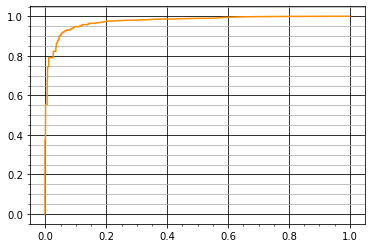

In [87]:
poly_deg = 2
x_confusionmat = sorted(TPR)
y_confusionmat = sorted(FPR[0:len(x_confusionmat)])

x_mat = y_mat = []
x_zero = y_zero = 0
for i in range(0,len(x_confusionmat)):
    if x_confusionmat[i] > 0 and y_confusionmat[i] > 0:
        x_mat.append(x_confusionmat[i])
        y_mat.append(y_confusionmat[i])
    else:
        x_zero += 1
        y_zero += 1
        
# print(x_mat)
# print(y_mat)
# print(x_zero)
# print(y_zero)

x_mat = np.insert(x_mat,0,x_confusionmat[x_zero-1])
y_mat = np.insert(y_mat,0,y_confusionmat[y_zero-1])

# plt.scatter(sorted(x_mat),sorted(y_mat))
        
coeff = polyregression_coefficients(x_mat,y_mat,poly_deg)
coeff
poly_plt,poly_cost = polyregression_line(x_mat, coeff, poly_deg)

# plt.scatter(x_mat,y_mat)
# Create list
x_list = list(range(0,len(poly_plt)))
new_list = [x / len(poly_plt) for x in x_list]

x_sig = sigmoid(np.array(x_list))
# print(x_sig)
# print(sorted(x_mat))
# print(x_list)

# print(np.mean(x_list))

# x_0 = (x_list - np.mean(x_list, axis=0))/np.std(x_list, axis=0)
# print(x_0)

# plt.plot(sorted(x_mat),sorted(poly_plt), color='darkorange')
plt.plot(new_list,poly_plt, color='darkorange')

# np.min(poly_plt)

# hplt_index = np.where(y_confusionmat == np.min(poly_plt))
# print(hplt_index)

# print(poly_plt)
# print(x_confusionmat)

# Complete line
# Create coordinates
coord_1 = (0,0)
coord_2 = (0,np.min(poly_plt))

plt.plot(coord_1,coord_2, color='darkorange')

plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')
# x_mat

poly_plt

poly_plt_curve = np.insert(poly_plt,len(poly_plt),[0,np.min(poly_plt)])
poly_plt_curve

In [88]:
# Setup Simpson's Rule

A = []
A.append(poly_plt[0])

# Run through values from index 1 to n-1

for i in range(1,len(poly_plt)-1):
    mod = i % 2
    if mod == 0:
        A.append(2 * poly_plt[i])
    else:
        A.append(4 * poly_plt[i])

# Add last value
A.append(poly_plt[-1])

# Approximate value under the curve
# Step Size
step = (1-0)/len(A)
# Calculate Area
simpson = np.multiply(np.sum(A),step)/3

print("Area Under Curve:", simpson)

Area Under Curve: 0.9759926382121474


In [89]:
FPR

[0,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.6666666666666666,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8333333333333334,
 0.8571428571428571,
 0.8571428571428571,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.8888888888888888,
 0.9,
 0.9090909090909091,
 0.9090909090909091,
 0.9090909090909091,
 0.909090909090

C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


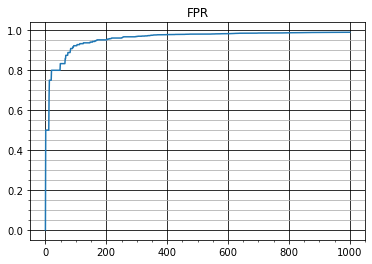

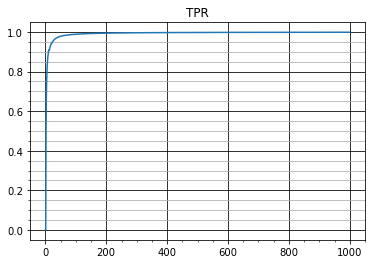

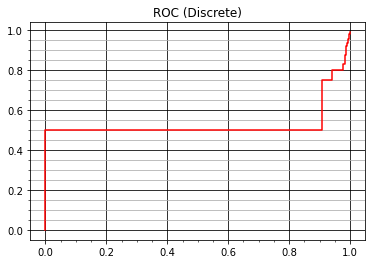

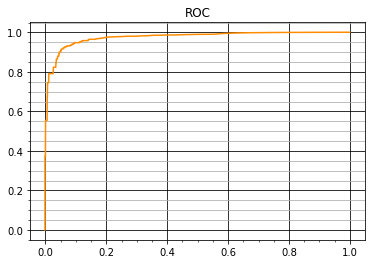

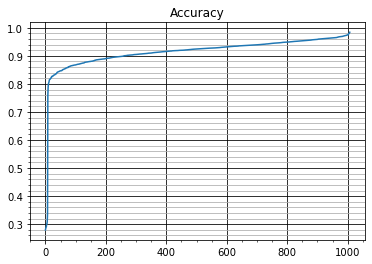

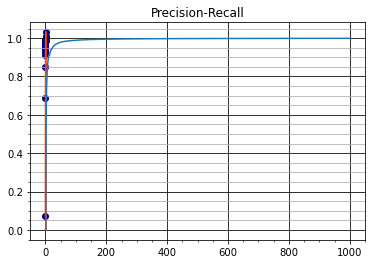

In [90]:
new = [i for i in FPR]

plot1 = plt.figure(1)
plt.title("FPR")
# FPR = int(FPR)
# plt.plot(sorted(new))
plt.plot(sorted(FPR))
# plt.title.set_text('FPR')
plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')

plot2 = plt.figure(2)
plt.title("TPR")
plt.plot(sorted(TPR))
# axs[0,1].plot(sorted(FPR))
# plt.title.set_text('TPR')
plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')

plot3 = plt.figure(3)
plt.title("ROC (Discrete)")
plt.plot(sorted(TPR),sorted(FPR[0:len(TPR)]), color='red')
# axs[1,0].plot(sorted(FPR[0:len(TPR)]),sorted(TPR), color='red')
# plt.title.set_text('ROC')
plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')

plot4 = plt.figure(4)
plt.title("ROC")
# axs[1,1].plot(sorted(h3))
plt.plot(new_list,poly_plt, color='darkorange')
plt.plot(coord_1,coord_2, color='darkorange')
# plt.title.set_text('ROC')
plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')

plot5 = plt.figure(5)
plt.title("Accuracy")
plt.plot(sorted(h4))
# plt.title.set_text('Accuracy')
plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')

plot6 = plt.figure(6)
plt.title("Precision-Recall")
plt.scatter(new_list_2,poly_plt_2, color='darkblue')
plt.plot(new_list_2,poly_plt_2, color = 'orangered')
plt.plot(coord_1_prec_recall,coord_2_prec_recall, color='orangered')
# plt.title.set_text('Precision-Recall')
plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')


# Grid Lines
plt.plot(sorted(TPR))
plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')

plt.show()

In [91]:
# Setup Confusion Matrix
# tp = 0
# fp = 1
# tn = 2
# fn = 3

FPR = con_mat[1]/(con_mat[1] + con_mat[2])
TPR = con_mat[0]/(con_mat[0] + con_mat[3])

print(con_mat)
print(FPR)
print(TPR)


conf(tp=895, fp=105, tn=1, fn=1)
0.9905660377358491
0.9988839285714286


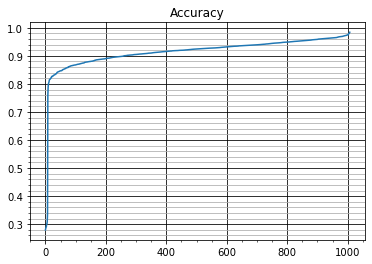

In [97]:
plt.title('Accuracy')
plt.plot(sorted(h4))
plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')


(1, 1)
(0, array([0.99888393]))


C:\Users\USER\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


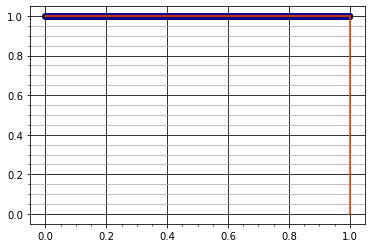

In [93]:
# (Precision),(TPR)
poly_deg = 3
coeff = polyregression_coefficients(Precision,TPR,poly_deg)
coeff
poly_plt_2,poly_cost_2 = polyregression_line(Precision, coeff, poly_deg)

x_list = list(range(0,len(poly_plt_2)))
poly_list = len(poly_plt_2)
new_list = [x / poly_list for x in x_list]

plt.scatter(new_list,poly_plt_2, color='darkblue')
plt.plot(new_list,poly_plt_2, color = 'orangered')

# x_ind_0 = np.argmin(poly_plt, axis=0)
# # x_ind_0
# poly_plt[x_ind_0]
# x_ind_1 = x_ind_0 + 1
# poly_plt_2 = poly_plt[1*10:]
# np.min(poly_plt_2)


# Complete line
# Create coordinates
coord_1 = (1,1)
coord_2 = (0,poly_plt_2[-1])

plt.plot(coord_1,coord_2, color='orangered')

plt.grid(True, 'major', color='k')
plt.minorticks_on()
plt.grid(True, 'minor', 'y')

np.min(poly_plt_2)

print(coord_1)
print(coord_2)